In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install  mlforecast
from mlforecast.utils import generate_daily_series
!pip install pyarrow
!pip install statsforecast
from statsforecast import StatsForecast
#importing for visualization process
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from math import sqrt
from sklearn.metrics import mean_squared_error
#import fbprophet
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.6 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.5-py3-none-any.whl size=157611 sha256=b623ea4c0f7e9ddbce346fbbfe12ab66e83fef42fb776347994a448f52ff5c6d
  Stored in directory: /root/.cache/pip/wheels/5d/dc/65/0a25b69011abd4e7a198ad0e4aa5399ae919082f6959deba31
Successfully built fugue-sql-antlr
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 957.3 kB/s eta

/opt/conda/lib/python3.7/site-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


![forecast](https://thumbs.dreamstime.com/z/man-holding-documents-demand-forecasting-name-108646291.jpg)

In [2]:
#reading ing_z data
ing_z=pd.read_csv('/kaggle/input/ing-z-z/ing_z.csv')

In [3]:
ing_z

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
0,2016-01-01 00:00:00,fid_87942,ing_z,499.2607,3.8,240.0,2.4,1021.0,3.1,93.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000
1,2016-01-01 00:00:00,fid_66870,ing_z,5295.0063,3.8,240.0,2.4,1021.0,3.1,93.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000
2,2016-01-01 00:00:00,fid_66062,ing_z,2992.0340,3.8,240.0,2.4,1021.0,3.1,93.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96.978
3,2016-01-01 00:00:00,fid_75323,ing_z,9334.9860,3.8,240.0,2.4,1021.0,3.1,93.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.597
4,2016-01-01 00:00:00,fid_75397,ing_z,12976.9700,3.8,240.0,2.4,1021.0,3.1,93.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287742,2016-04-28 12:00:00,fid_74945,ing_z,7561.3750,0.5,340.0,-7.1,1021.0,3.6,59.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,195.438
1287743,2016-12-17 06:00:00,fid_112848,ing_z,6320.1910,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,459.597
1287744,2016-12-17 06:00:00,fid_58769,ing_z,8659.1170,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,359.514
1287745,2016-12-17 06:00:00,fid_117010,ing_z,11857.3955,-17.1,60.0,-19.2,1022.5,2.6,84.44,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,246.516


In [4]:
#converting date to datetime format for predictions
ing_z['date'] = pd.to_datetime(ing_z['date'])

In [5]:
#setting index according to the date and sorting the index
ing_z = ing_z.set_index(ing_z['date'])
ing_z = ing_z.sort_index()

In [6]:
# create train test partition
train = ing_z['2016-01-01 00:00:00':'2016-11-30 00:00:00']
test  = ing_z['2016-12-01':]
print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)

Train Dataset: (1175195, 43)
Test Dataset: (109165, 43)


In [7]:
train

,date,farm_id,ingredient_type,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2016-01-01,fid_87942,ing_z,499.2607,3.8,240.0,2.4,1021.0,3.1,93.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000
2016-01-01,2016-01-01,fid_66920,ing_z,4613.7490,15.6,270.0,-5.6,1015.5,3.6,24.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.2580
2016-01-01,2016-01-01,fid_83463,ing_z,3382.2266,15.6,270.0,-5.6,1015.5,3.6,24.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.6536
2016-01-01,2016-01-01,fid_99942,ing_z,12733.7500,15.6,270.0,-5.6,1015.5,3.6,24.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.5150
2016-01-01,2016-01-01,fid_57301,ing_z,26286.5330,15.6,270.0,-5.6,1015.5,3.6,24.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.5150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-30,2016-11-30,fid_48416,ing_z,12311.3190,15.0,230.0,-4.4,1014.5,3.6,26.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.7921
2016-11-30,2016-11-30,fid_99410,ing_z,4106.5913,15.0,230.0,-4.4,1014.5,3.6,26.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2016-11-30,2016-11-30,fid_80963,ing_z,15520.9330,15.0,230.0,-4.4,1014.5,3.6,26.73,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [8]:
#resampling train data according to the hours and interpolating with linear method
train = train.resample('H').mean()
train = train.interpolate(method='linear')
#resampling test data according to the hours and interpolating with linear method
test = test.resample('H').mean()
test= test.interpolate(method='linear')

By performing these operations on the datasets, we are preparing them for further analysis, such as time series forecasting or machine learning. Resampling and interpolation can help to reduce noise and make the data more consistent, which can improve the accuracy of the analysis.

**yield_Linear_Interpolation**

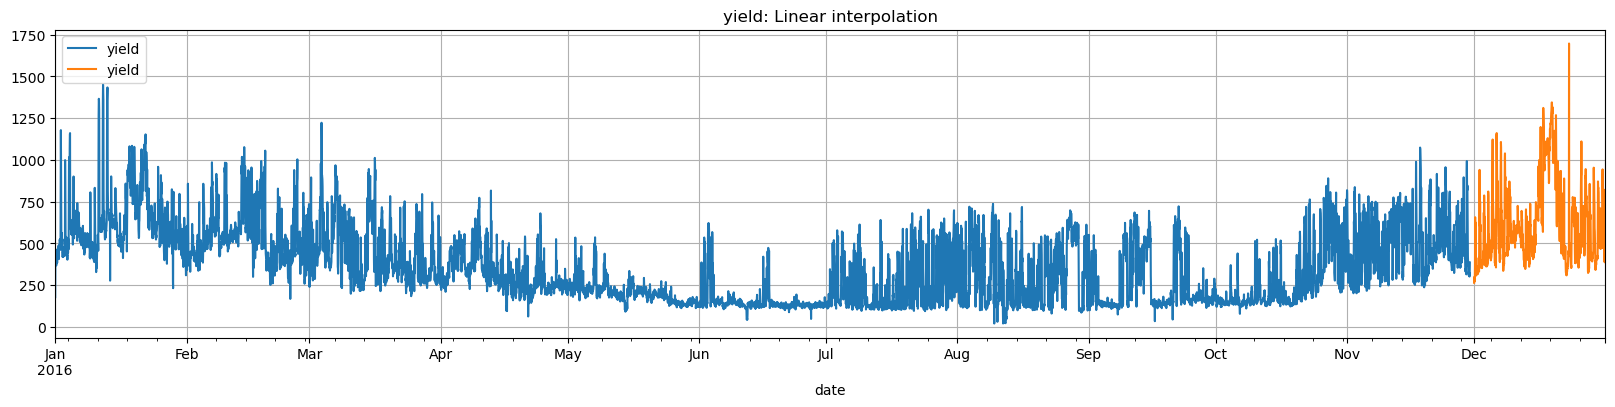

In [9]:
train = train.assign(yield_Linear_Interpolation=train['yield'].interpolate(method='linear'))
train[['yield']].plot(figsize=(20, 4))
test["yield"].plot()
plt.grid()
plt.legend(loc='best')
plt.title('yield: Linear interpolation')
plt.show(block=False)

In [10]:
#The rolling() method in Pandas is used to perform a rolling computation over a specified window size
movingaverage=train.rolling(window=12).mean()
movingstd=train.rolling(window=12).std()

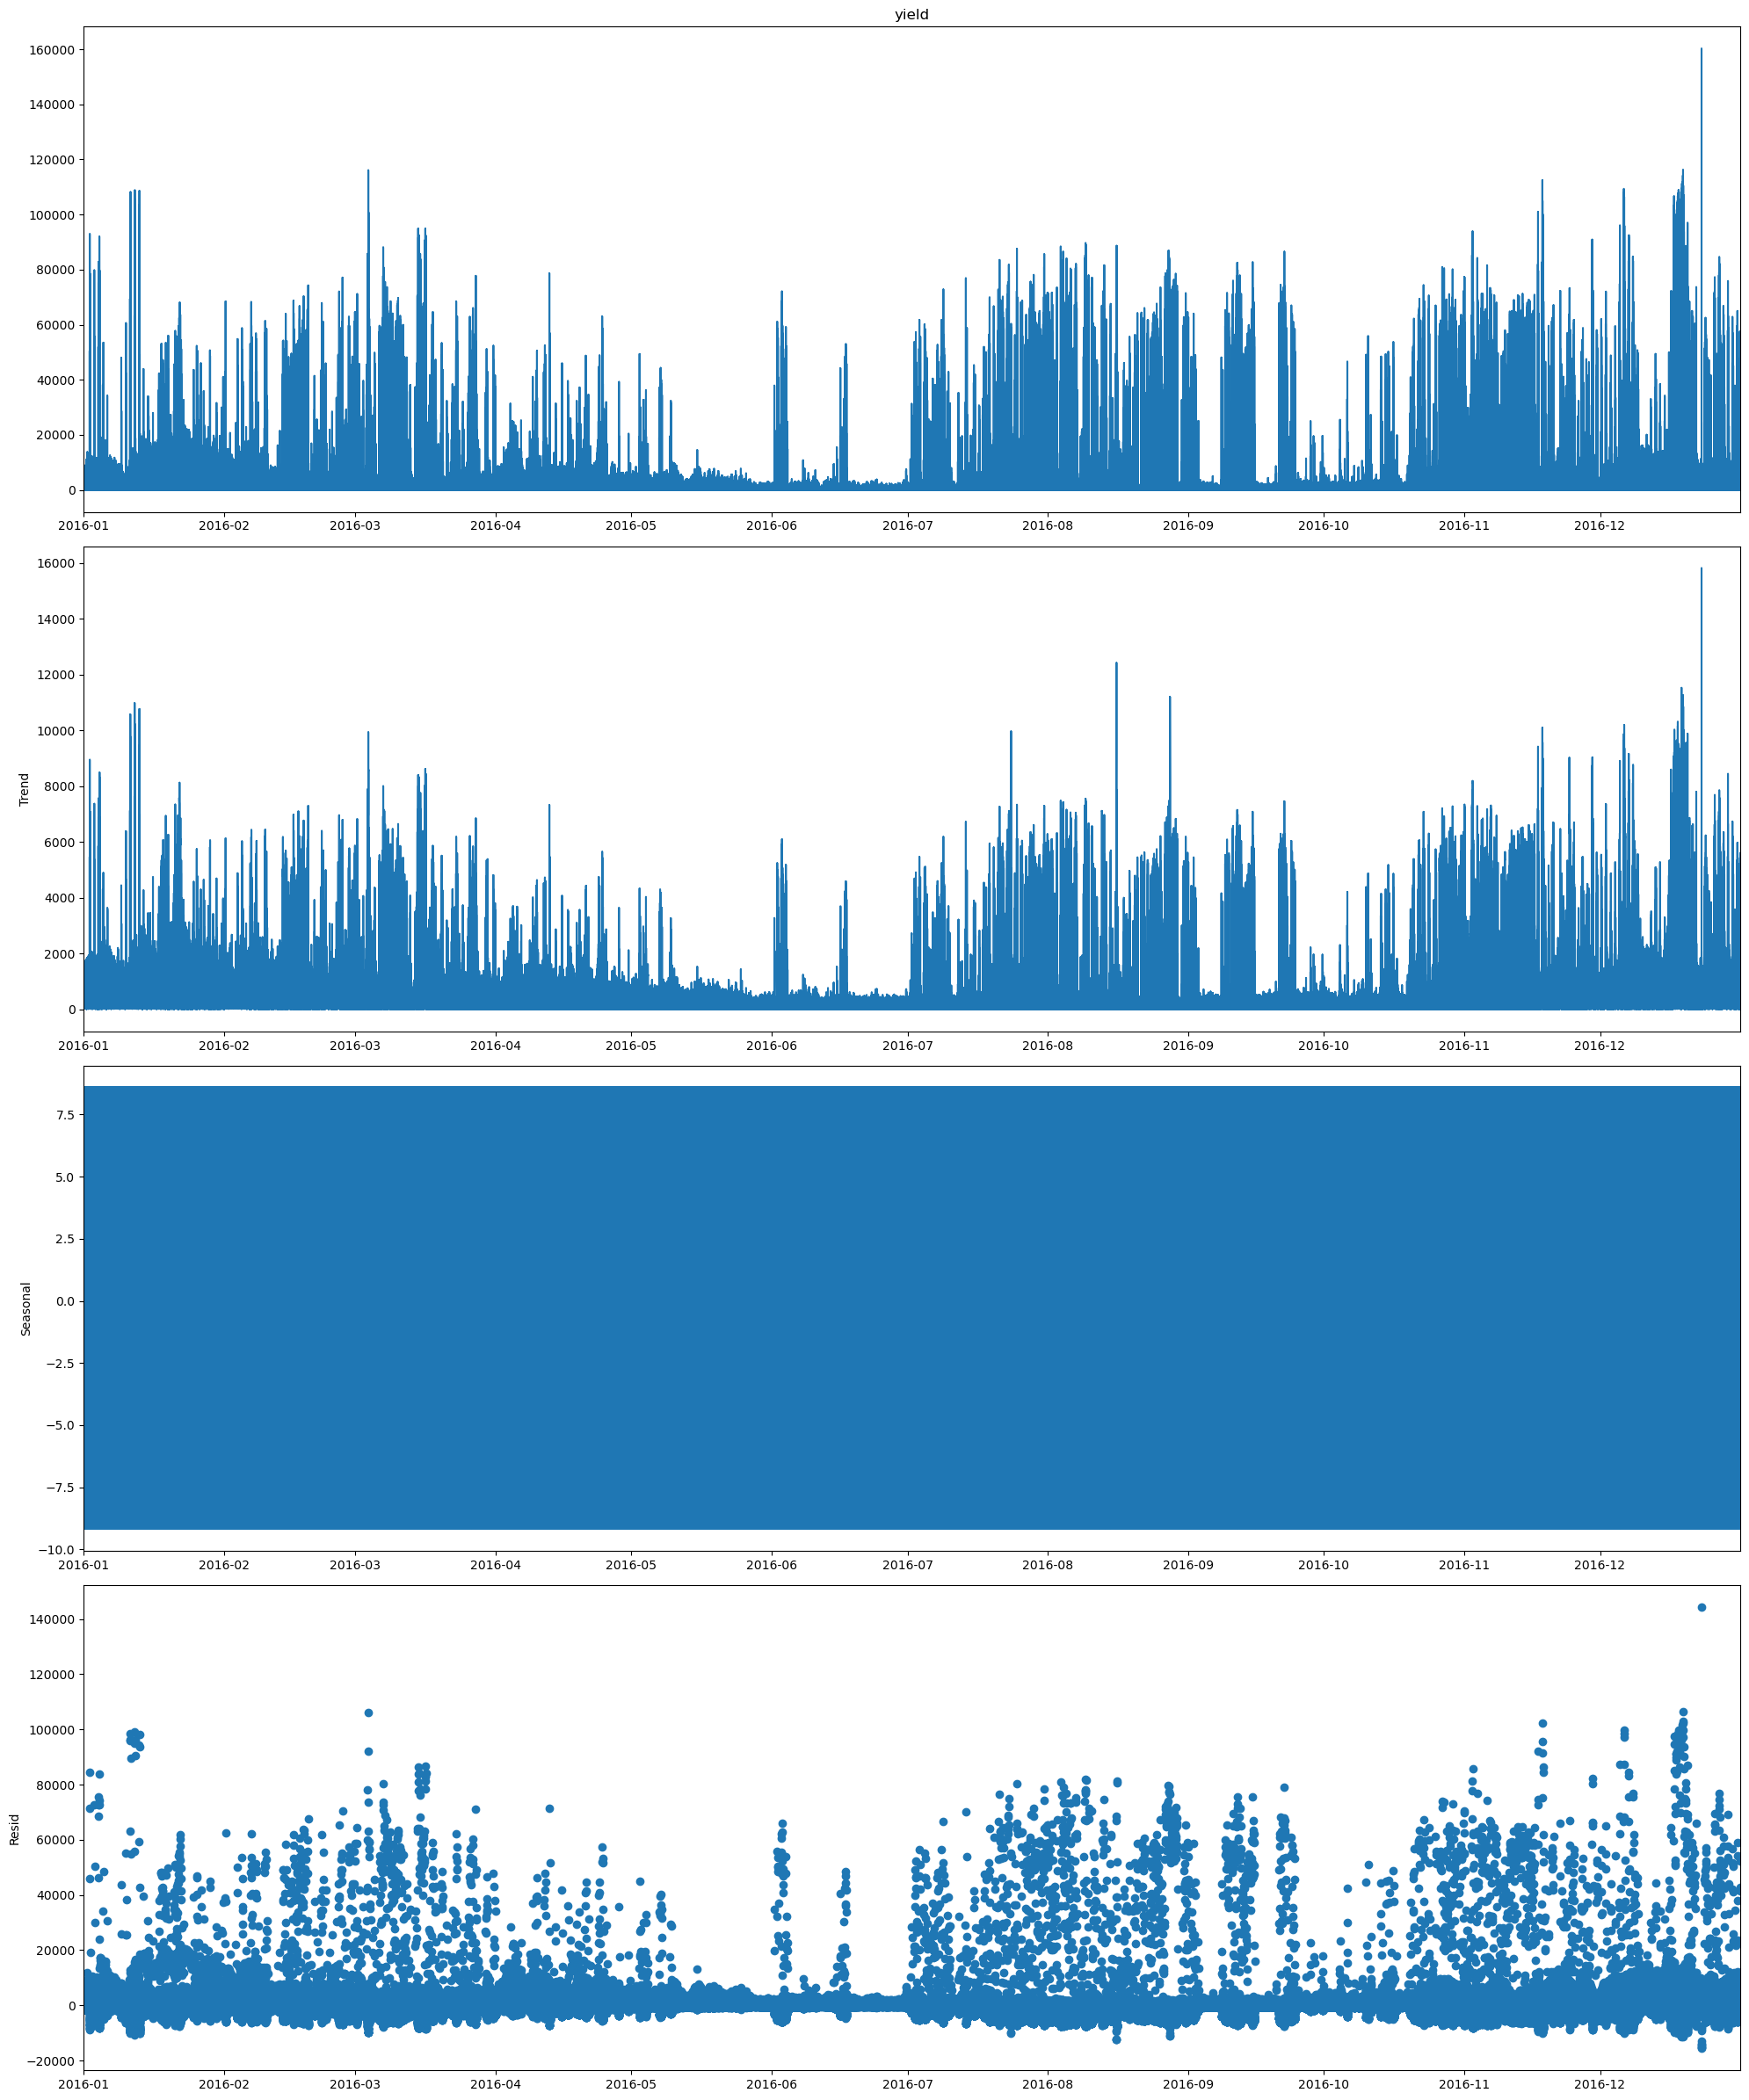

In [11]:
# plotting seasonal decompose of train data
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20,24
decomposition = sm.tsa.seasonal_decompose(ing_z['yield'], model='additive',period =12) # additive seasonal index
fig = decomposition.plot()
plt.show()

Tts following a trend as we can see above and at a particular time the yield has been increased on october to november region.

**PERFORMING y_hat_avg_moving FOR TEST DATA**

Text(0.5, 1.0, 'Moving Average Forecast')

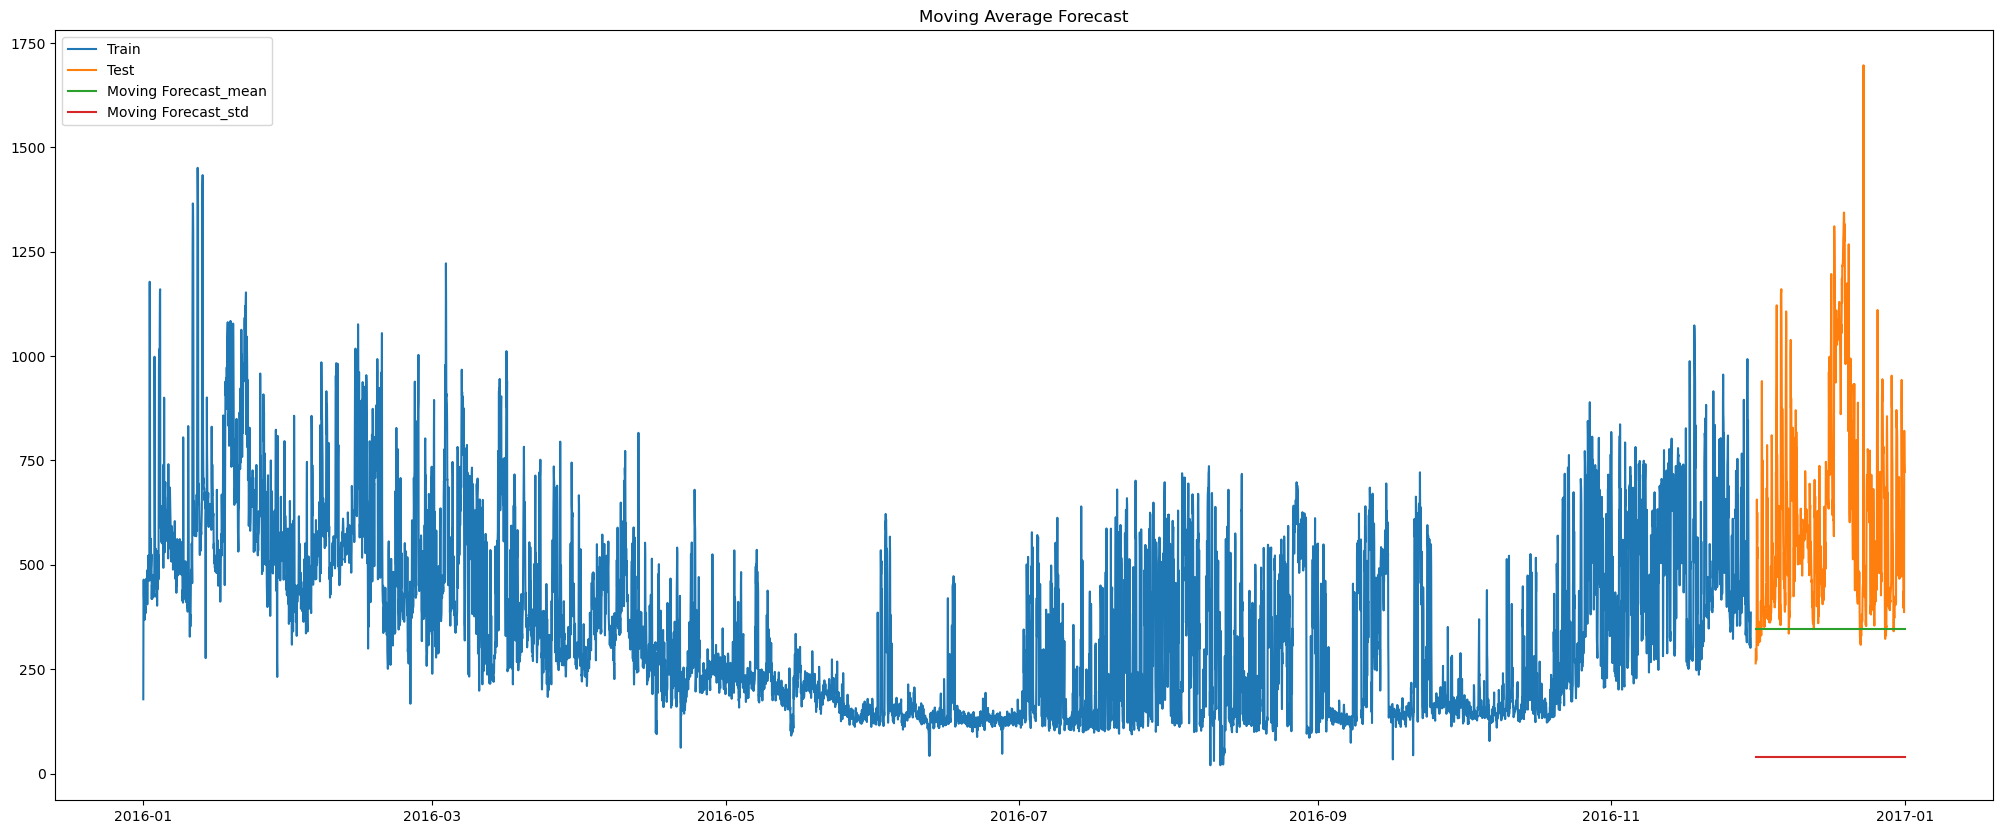

In [12]:
y_hat_avg_moving = test.copy()
y_hat_avg_moving['moving_avg_forcast_mean'] = train['yield'].rolling(window=12).mean().iloc[-1]
y_hat_avg_moving['moving_avg_forcast_std'] = train['yield'].rolling(window=12).std().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving['moving_avg_forcast_mean'], label='Moving Forecast_mean')
plt.plot(y_hat_avg_moving['moving_avg_forcast_std'], label='Moving Forecast_std')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [13]:
y_hat_avg_moving

,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,Relative_humidity,farming_company_Del Monte Foods,farming_company_Dole Food Company,farming_company_Foster Farms,...,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,yield,moving_avg_forcast_mean,moving_avg_forcast_std
date,,,,,,,,,,,,,,,,,,,,,
2016-12-01 00:00:00,10592.47672,11.006757,177.635135,0.965541,1012.104730,2.844595,63.197297,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,263.936701,346.068866,39.831651
2016-12-01 01:00:00,10592.47672,10.657432,179.729730,1.011486,1011.341216,2.894595,63.408581,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,298.736076,346.068866,39.831651
2016-12-01 02:00:00,10592.47672,10.282432,182.635135,1.298649,1010.878378,3.046622,63.698108,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,292.205147,346.068866,39.831651
2016-12-01 03:00:00,10592.47672,9.154054,151.756757,3.627703,1010.354730,2.922297,76.163378,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,270.932176,346.068866,39.831651
2016-12-01 04:00:00,10592.47672,8.893243,165.405405,3.683108,1009.672297,2.881081,72.829865,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,279.867749,346.068866,39.831651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,10592.47672,8.193919,188.243243,0.281757,1015.317568,4.743919,62.399459,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,413.349027,346.068866,39.831651
2016-12-31 20:00:00,10592.47672,8.128378,214.054054,0.410135,1014.493243,4.506757,62.454324,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,386.649229,346.068866,39.831651
2016-12-31 21:00:00,10592.47672,8.342568,191.216216,0.222297,1013.929054,4.705405,60.820541,0.060811,0.074324,0.02027,...,0.0,0.0,0.0,0.0,0.006757,0.033784,0.081081,820.996756,346.068866,39.831651


In [14]:
#CHECKING RMSE VALUES OF MOVING AVERAGE
rms_avg_rolling = sqrt(mean_squared_error(test['yield'],y_hat_avg_moving['moving_avg_forcast_mean']))
print('ROLLING AVERAGE',rms_avg_rolling)

ROLLING AVERAGE 367.69279353732765


**ExponentialSmoothing**

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


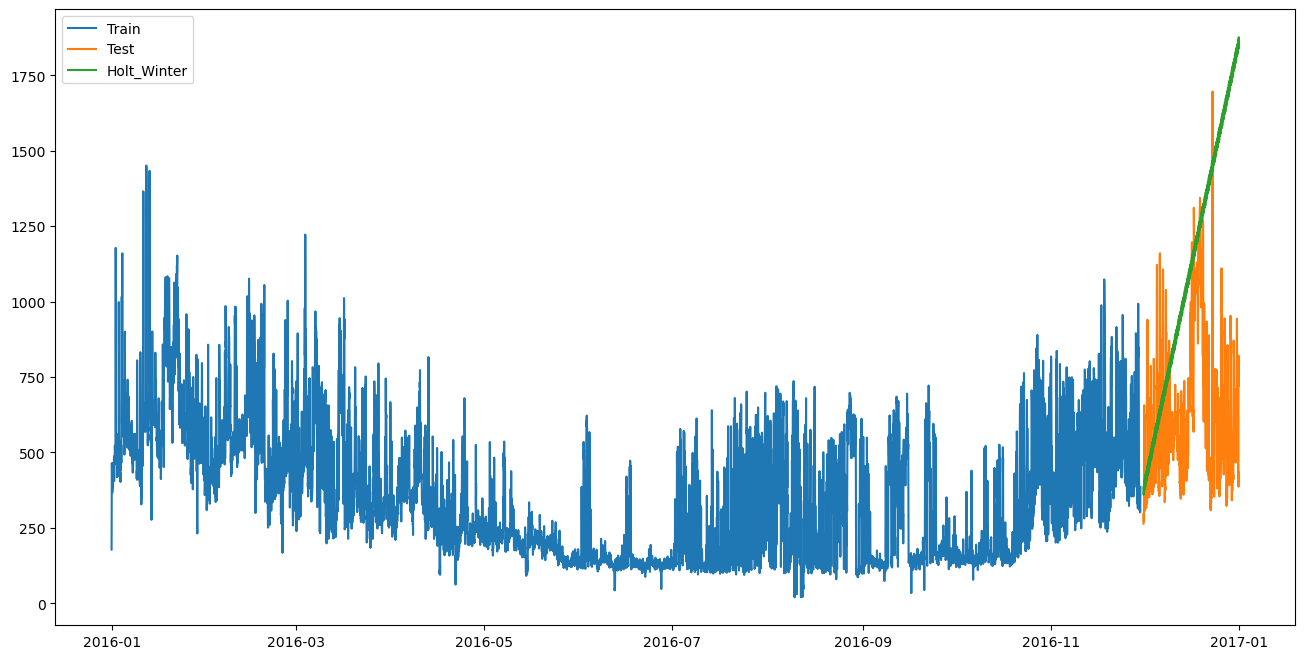

In [15]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['yield']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [16]:
rmse = sqrt(mean_squared_error(test['yield'], y_hat_avg.Holt_Winter))
print(rmse)

676.9390292932302


In [17]:
 y_hat_avg.Holt_Winter

date
2016-12-01 00:00:00     384.333284
2016-12-01 01:00:00     359.920591
2016-12-01 02:00:00     364.964306
2016-12-01 03:00:00     365.223097
2016-12-01 04:00:00     402.863120
                          ...     
2016-12-31 19:00:00    1859.434066
2016-12-31 20:00:00    1837.153349
2016-12-31 21:00:00    1863.059220
2016-12-31 22:00:00    1876.243353
2016-12-31 23:00:00    1848.000112
Freq: H, Name: Holt_Winter, Length: 744, dtype: float64

The rolling average for our model is 19.988482627808388. This prediction seems to be very consistent in hitting the average of the future sales. This naive model definitely looks like a solid model, however, it is not the best one.so we are considering moving average as a best model

**TEST DATA**

In [18]:
#reading the test data
ing_z_test= pd.read_csv("/kaggle/input/ing-z-test/ing_z_test.csv")

In [19]:
#checking the value counts of ing_z_test
ing_z_test['farm_id'].value_counts()

fid_68761     17520
fid_73431     17519
fid_63700     17508
fid_105851     8760
fid_67085      8760
              ...  
fid_74945      8246
fid_36739      8246
fid_112848     8246
fid_58769      8246
fid_117010     8246
Name: farm_id, Length: 145, dtype: int64

In [20]:
#checking the value counts of ing_z
ing_z['farm_id'].value_counts()

fid_73431    17564
fid_68761    17560
fid_63700    17515
fid_96233     8782
fid_91594     8782
             ...  
fid_77688     8304
fid_13316     7811
fid_75152     7169
fid_46342     7047
fid_40781     5622
Name: farm_id, Length: 145, dtype: int64

as both the farm_id unique values length is same going further for forcasting

**PREPROCESSING ing_z_TEST DATA**

In [21]:
ing_z_test['date'] = pd.to_datetime(ing_z_test['date'])

In [22]:
ing_z_test = ing_z_test.set_index(ing_z_test['date'])
ing_z_test = ing_z_test.sort_index()

Text(0.5, 1.0, 'Moving Average Forecast')

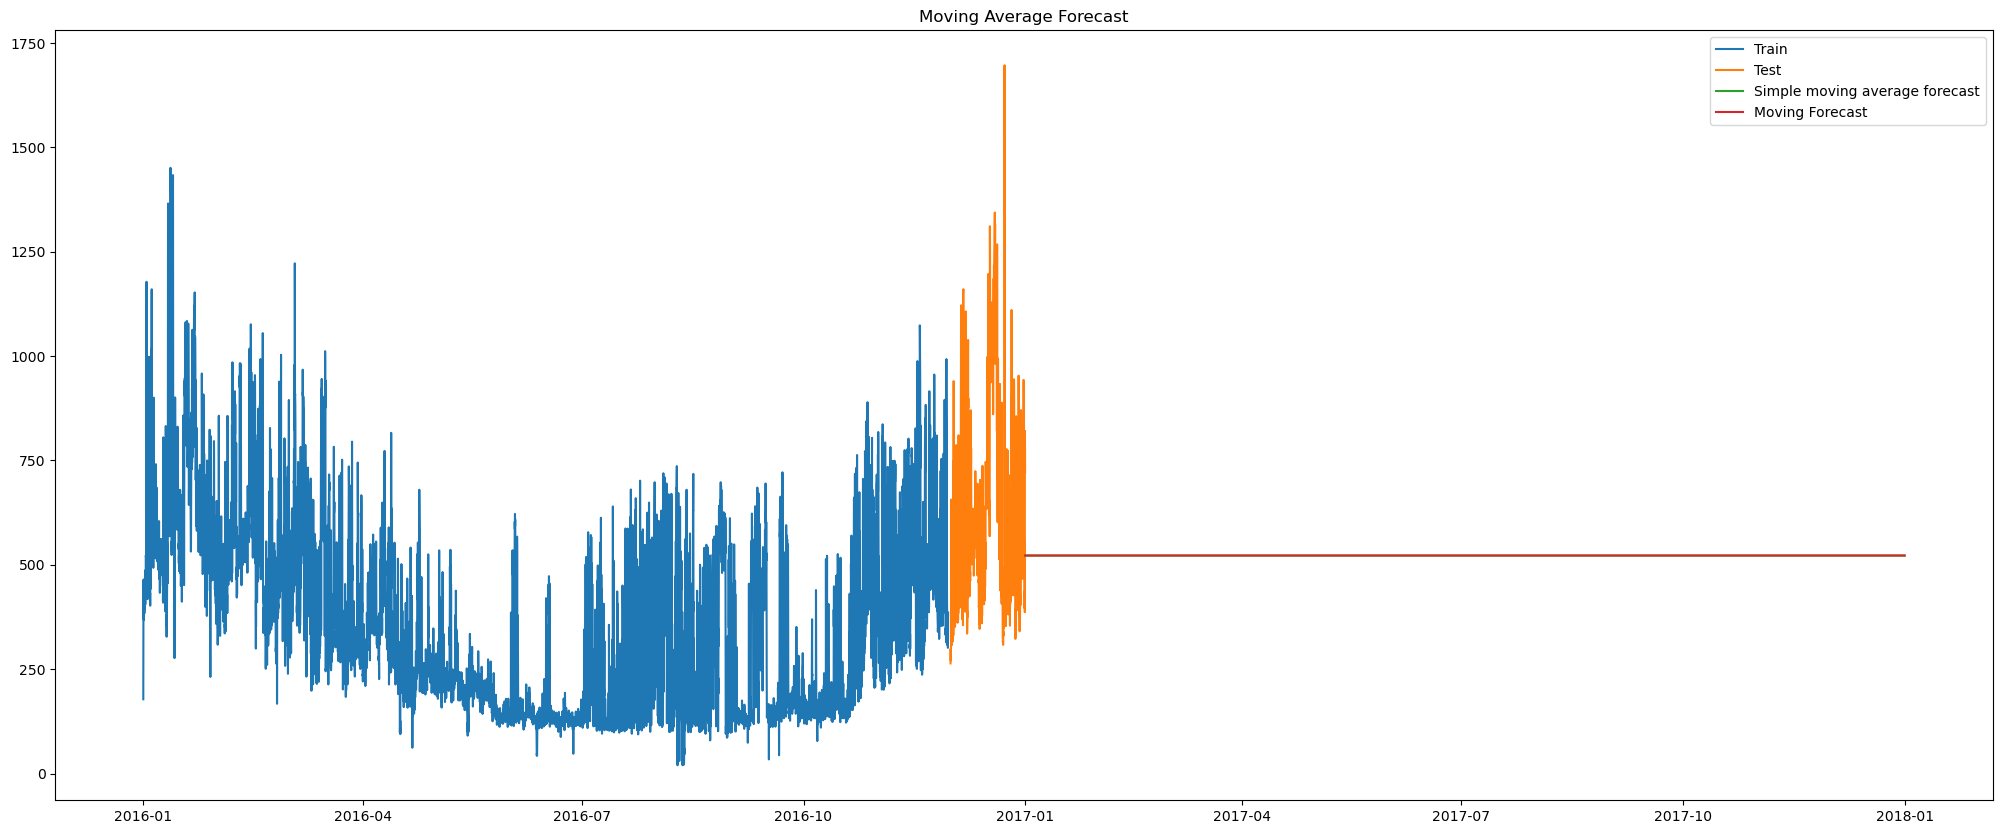

In [23]:
y_hat_avg_moving_pred = ing_z_test.copy()
y_hat_avg_moving_pred['moving_avg_forcast'] = train['yield'].rolling(200).mean().iloc[-1]
plt.figure(figsize=(25,10))
plt.plot(train['yield'], label='Train')
plt.plot(test['yield'], label='Test')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Simple moving average forecast')
plt.plot(y_hat_avg_moving_pred['moving_avg_forcast'], label='Moving Forecast')
plt.legend(loc='best')
plt.title('Moving Average Forecast')

In [24]:
y_hat_avg_moving_pred

,date,farm_id,ingredient_type,id,farm_area,temp_obs,wind_direction,dew_temp,pressure_sea_level,wind_speed,...,deidentified_location_location 565,deidentified_location_location 5677,deidentified_location_location 5833,deidentified_location_location 6364,deidentified_location_location 7048,deidentified_location_location 7369,deidentified_location_location 8421,deidentified_location_location 868,deidentified_location_location 959,moving_avg_forcast
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_87942,ing_z,2260082,499.2607,6.7,200.0,5.2,1024.0,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_117986,ing_z,3349364,5997.8180,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_94856,ing_z,3349361,18806.8180,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_18061,ing_z,3349356,8892.3960,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_90391,ing_z,3349350,10340.4760,16.1,310.0,9.4,1010.5,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_86326,ing_z,5880691,13386.0210,20.6,0.0,-8.3,1016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_62549,ing_z,5880698,9888.5960,20.6,0.0,-8.3,1016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_90391,ing_z,5880701,10340.4760,20.6,0.0,-8.3,1016.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,522.337149


In [25]:
predictions = y_hat_avg_moving_pred[['date','farm_id','moving_avg_forcast']]

In [26]:
predictions

,date,farm_id,moving_avg_forcast
date,,,
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_87942,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_117986,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_94856,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_18061,522.337149
2017-01-01 00:00:00,2017-01-01 00:00:00,fid_90391,522.337149
...,...,...,...
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_86326,522.337149
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_62549,522.337149
2017-12-31 23:00:00,2017-12-31 23:00:00,fid_90391,522.337149


In [27]:
predictions_ing_z = pd.DataFrame(predictions)

In [28]:
predictions_ing_z.to_csv('predictions_ing_z.csv', index=False)

In [29]:
# convert the data with respect to the month
predictions_ing_z['date'] = pd.to_datetime(predictions_ing_z['date'])
predictions_ing_z['month'] = predictions_ing_z['date'].dt.month
monthly_data_predictions_ing_z= predictions_ing_z.groupby('month').agg({'moving_avg_forcast': 'sum'})

# print the monthly data
print(monthly_data_predictions_ing_z)

       moving_avg_forcast
month                    
1            5.725129e+07
2            5.189211e+07
3            5.707265e+07
4            5.551451e+07
5            5.747067e+07
6            5.552444e+07
7            5.750566e+07
8            5.735575e+07
9            5.552392e+07
10           5.751036e+07
11           5.561846e+07
12           5.638368e+07


In [30]:
monthly_data_predictions_ing_z

,moving_avg_forcast
month,
1,5.725129e+07
2,5.189211e+07
3,5.707265e+07
4,5.551451e+07
5,5.747067e+07
6,5.552444e+07
7,5.750566e+07
8,5.735575e+07
9,5.552392e+07


In [31]:
# Convert the column to float
monthly_data_predictions_ing_z['moving_avg_forcast'] = monthly_data_predictions_ing_z['moving_avg_forcast'].astype(int)

In [32]:
monthly_data_predictions_ing_z.reset_index()

,month,moving_avg_forcast
0,1,57251285
1,2,51892106
2,3,57072646
3,4,55514514
4,5,57470667
5,6,55524438
6,7,57505663
7,8,57355753
8,9,55523916
9,10,57510364
